In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/Users/xinyue/Desktop/Project 2/Geelong.csv'
df = pd.read_csv(file_path)
print(df)

  Unnamed: 0               Unnamed: 1 Mar 2010 Unnamed: 83 Jun 2010  \
0    Geelong        Belmont-Grovedale    1,558     $270.00    1,530   
1        NaN                    Corio      628     $210.00      672   
2        NaN         Geelong-Newcombe      992     $250.00      974   
3        NaN  Herne Hill-Geelong West      758     $245.00      749   
4        NaN                     Lara      317     $270.00      314   
5        NaN                  Newtown      477     $270.00      465   
6        NaN            North Geelong      596     $250.00      596   
7        NaN              Group Total    5,326     $250.00    5,300   

  Unnamed: 85 Sep 2010 Unnamed: 87 Dec 2010 Unnamed: 89  ... Mar 2019  \
0     $275.00    1,529     $280.00    1,521     $290.00  ...    1,790   
1     $210.00      725     $220.00      718     $225.00  ...      872   
2     $260.00      988     $270.00    1,036     $270.00  ...    1,282   
3     $250.00      717     $250.00      710     $260.00  ...      72

In [2]:
# Create a new header row with 'Count' and 'Median' labels starting from the third column
new_header = ['Area', 'Suburb']  # Start with 'Area' and 'Suburb' for the first two columns

# Use a loop to dynamically generate 'Count.1', 'Median.1', 'Count.2', 'Median.2', etc.
count_num = 1  # Initialize count number
median_num = 1  # Initialize median number

# Start from the third column
for i in range(2, len(df.columns)):
    if (i - 2) % 4 == 0:  # Every 4th column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    elif (i - 2) % 4 == 1:  # Every 2nd column after 'Count' should be 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1
    elif (i - 2) % 4 == 2:  # Every 2nd column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    else:  # Remaining columns are 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1

# Assign the new header row to the DataFrame columns
df.columns = new_header

In [3]:
# Filter out the columns that contain 'Median' in their name to get the median rental prices
median_columns = [col for col in df.columns if 'Median' in col]

# Extract only the 'Median' columns along with the 'Suburb' column
median_data = df[['Suburb'] + median_columns].copy()

print(median_data)

                    Suburb Median.1 Median.2 Median.3 Median.4 Median.5  \
0        Belmont-Grovedale  $270.00  $275.00  $280.00  $290.00  $300.00   
1                    Corio  $210.00  $210.00  $220.00  $225.00  $230.00   
2         Geelong-Newcombe  $250.00  $260.00  $270.00  $270.00  $280.00   
3  Herne Hill-Geelong West  $245.00  $250.00  $250.00  $260.00  $270.00   
4                     Lara  $270.00  $273.00  $280.00  $285.00  $290.00   
5                  Newtown  $270.00  $270.00  $275.00  $280.00  $285.00   
6            North Geelong  $250.00  $260.00  $265.00  $270.00  $275.00   
7              Group Total  $250.00  $260.00  $260.00  $270.00  $275.00   

  Median.6 Median.7 Median.8 Median.9  ... Median.32 Median.33 Median.34  \
0  $300.00  $305.00  $310.00  $310.00  ...   $350.00   $360.00   $360.00   
1  $230.00  $240.00  $240.00  $240.00  ...   $260.00   $265.00   $270.00   
2  $280.00  $290.00  $290.00  $290.00  ...   $320.00   $320.00   $325.00   
3  $270.00  $275.00 

In [4]:
# Convert each median rental price column to numeric, removing non-numeric characters
for col in median_data.columns:
    if 'Median' in col:
        # Remove any dollar signs or non-numeric characters and convert to numeric
        median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')
print(median_data)

                    Suburb  Median.1  Median.2  Median.3  Median.4  Median.5  \
0        Belmont-Grovedale     270.0     275.0     280.0     290.0     300.0   
1                    Corio     210.0     210.0     220.0     225.0     230.0   
2         Geelong-Newcombe     250.0     260.0     270.0     270.0     280.0   
3  Herne Hill-Geelong West     245.0     250.0     250.0     260.0     270.0   
4                     Lara     270.0     273.0     280.0     285.0     290.0   
5                  Newtown     270.0     270.0     275.0     280.0     285.0   
6            North Geelong     250.0     260.0     265.0     270.0     275.0   
7              Group Total     250.0     260.0     260.0     270.0     275.0   

   Median.6  Median.7  Median.8  Median.9  ...  Median.32  Median.33  \
0     300.0     305.0     310.0     310.0  ...      350.0      360.0   
1     230.0     240.0     240.0     240.0  ...      260.0      265.0   
2     280.0     290.0     290.0     290.0  ...      320.0      

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/_s/4j24gf8n0ls5dt1yjm000kbr0000gn/T/ipykernel_58226/4014745995.py:5: SyntaxWarning: invalid escape sequence '\$'
  median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')


In [5]:
# Round the 'Median' columns to the nearest integer and convert to integer type
for col in median_columns:
    median_data[col] = median_data[col].round().astype('Int64')  # Use 'Int64' to allow for NaN values

# Print the converted data to ensure that all columns have been properly converted
print("Median Data after conversion to integers:")
print(median_data.head())

Median Data after conversion to integers:
                    Suburb  Median.1  Median.2  Median.3  Median.4  Median.5  \
0        Belmont-Grovedale       270       275       280       290       300   
1                    Corio       210       210       220       225       230   
2         Geelong-Newcombe       250       260       270       270       280   
3  Herne Hill-Geelong West       245       250       250       260       270   
4                     Lara       270       273       280       285       290   

   Median.6  Median.7  Median.8  Median.9  ...  Median.32  Median.33  \
0       300       305       310       310  ...        350        360   
1       230       240       240       240  ...        260        265   
2       280       290       290       290  ...        320        320   
3       270       275       270       275  ...        328        325   
4       300       300       303       305  ...        360        360   

   Median.34  Median.35  Median.36  Median.3

Growth trend for Belmont-Grovedale:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0      <NA>  1.851852  1.818182  3.571429  3.448276       0.0  1.666667   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
0  1.639344       0.0   1.612903  ...   2.857143        0.0   1.388889   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
0   1.369863   1.351351   1.333333        0.0        0.0  18.421053   

   Average Growth Rate (%)  
0                 1.325387  

[1 rows x 42 columns]


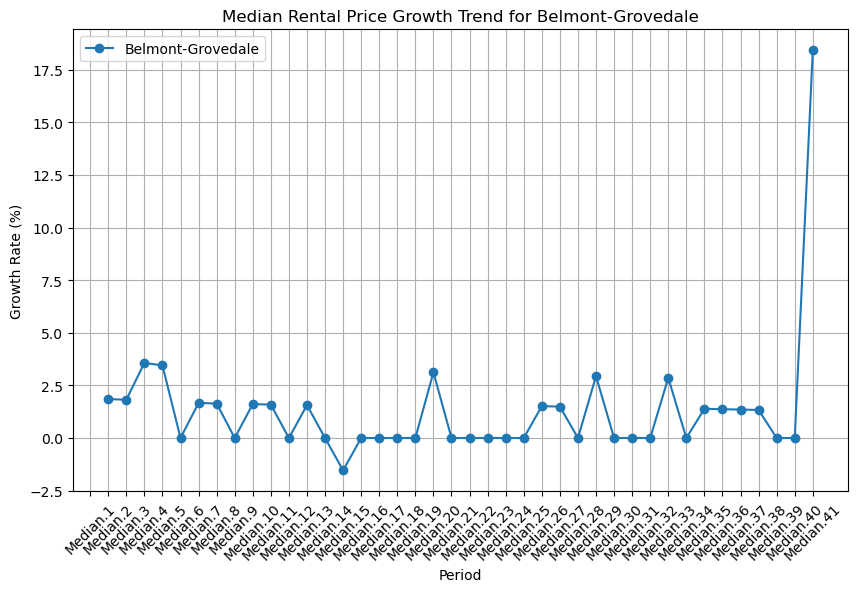

Growth trend for Corio:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
1      <NA>       0.0  4.761905  2.272727  2.222222       0.0  4.347826   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
1       0.0       0.0   2.083333  ...   1.923077   1.886792   1.851852   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
1   1.818182        0.0   1.785714   1.754386   1.724138  18.644068   

   Average Growth Rate (%)  
1                 1.326946  

[1 rows x 42 columns]


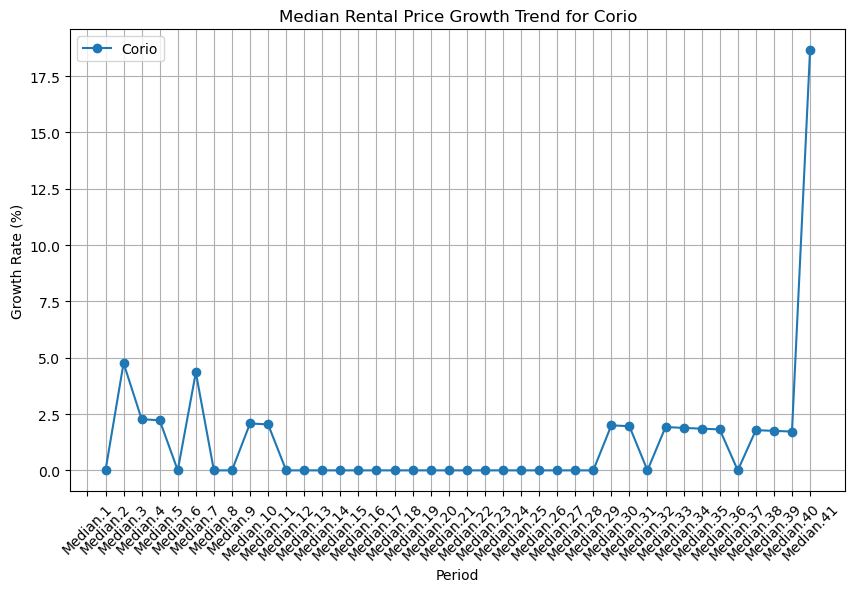

Growth trend for Geelong-Newcombe:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
2      <NA>       4.0  3.846154       0.0  3.703704       0.0  3.571429   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
2       0.0       0.0        0.0  ...        0.0     1.5625   1.538462   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
2        0.0   3.030303        0.0   2.941176        0.0  21.428571   

   Average Growth Rate (%)  
2                 1.390012  

[1 rows x 42 columns]


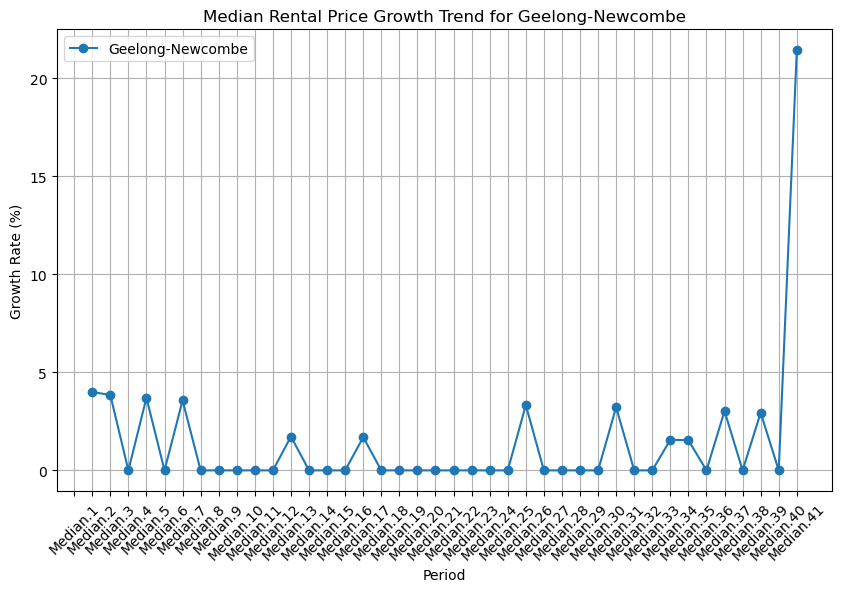

Growth trend for Herne Hill-Geelong West:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
3      <NA>  2.040816       0.0       4.0  3.846154       0.0  1.851852   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
3 -1.818182  1.851852   1.818182  ...  -0.914634        0.0   1.538462   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
3   1.515152   4.477612        0.0        0.0   2.857143  16.666667   

   Average Growth Rate (%)  
3                 1.398067  

[1 rows x 42 columns]


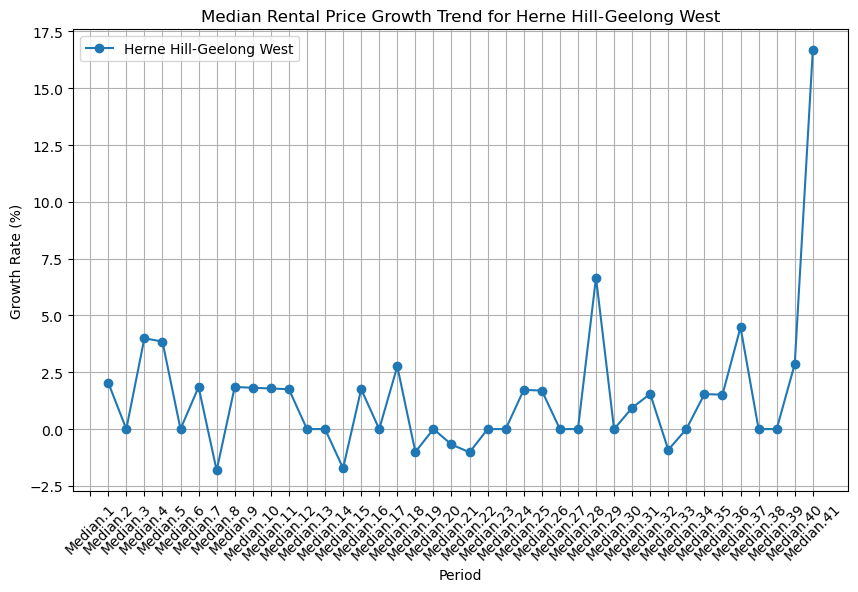

Growth trend for Lara:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
4      <NA>  1.111111  2.564103  1.785714  1.754386  3.448276       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
4       1.0  0.660066   4.918033  ...        0.0   0.833333   4.683196   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
4        0.0   1.315789   1.298701        0.0        0.0  24.358974   

   Average Growth Rate (%)  
4                 1.541424  

[1 rows x 42 columns]


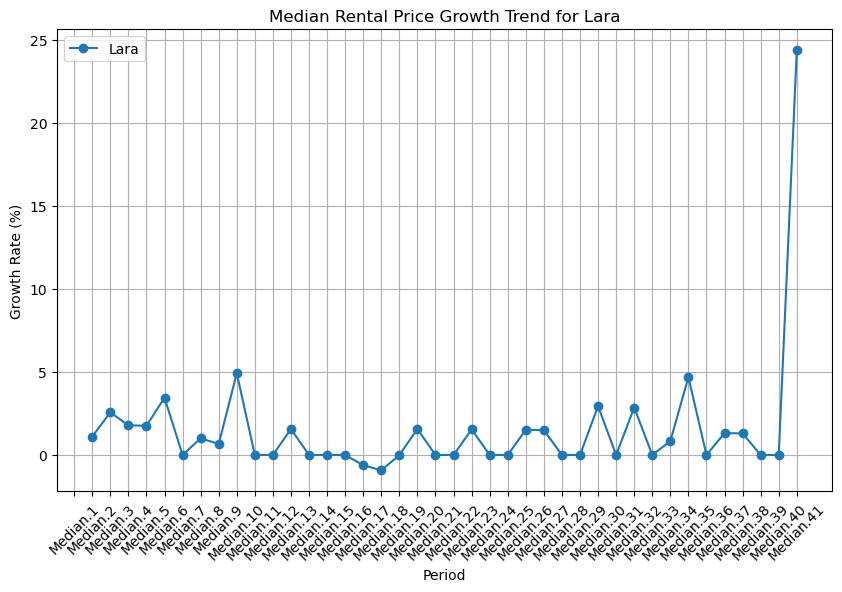

Growth trend for Newtown:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
5      <NA>       0.0  1.851852  1.818182  1.785714  5.263158       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
5       2.0   1.30719  -3.225806  ...        0.0   2.857143        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
5   4.166667        0.0   1.333333        0.0        0.0  18.421053   

   Average Growth Rate (%)  
5                 1.332605  

[1 rows x 42 columns]


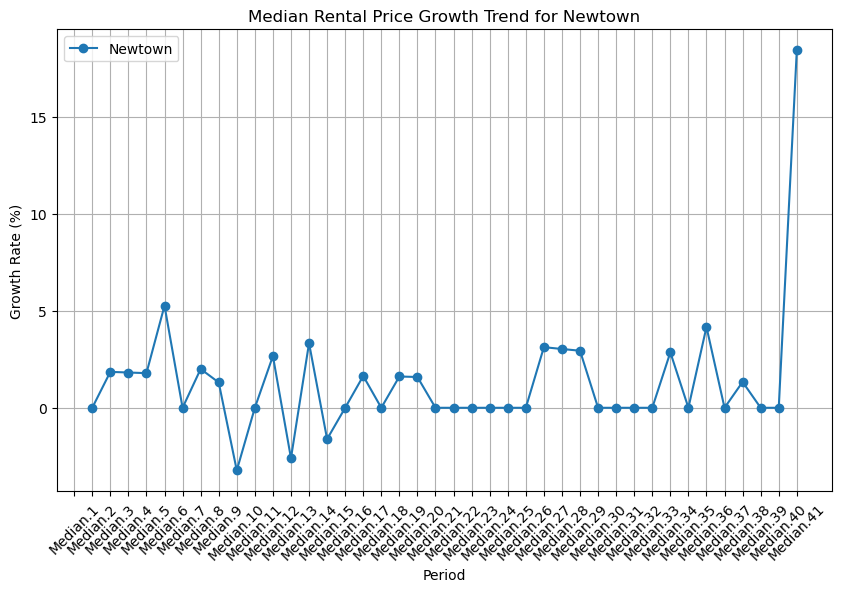

Growth trend for North Geelong:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
6      <NA>       4.0  1.923077  1.886792  1.851852       0.0  1.818182   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
6  1.785714  3.508772   1.694915  ...   0.606061   2.409639        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
6        0.0   1.470588   1.449275        0.0        0.0  22.857143   

   Average Growth Rate (%)  
6                 1.423918  

[1 rows x 42 columns]


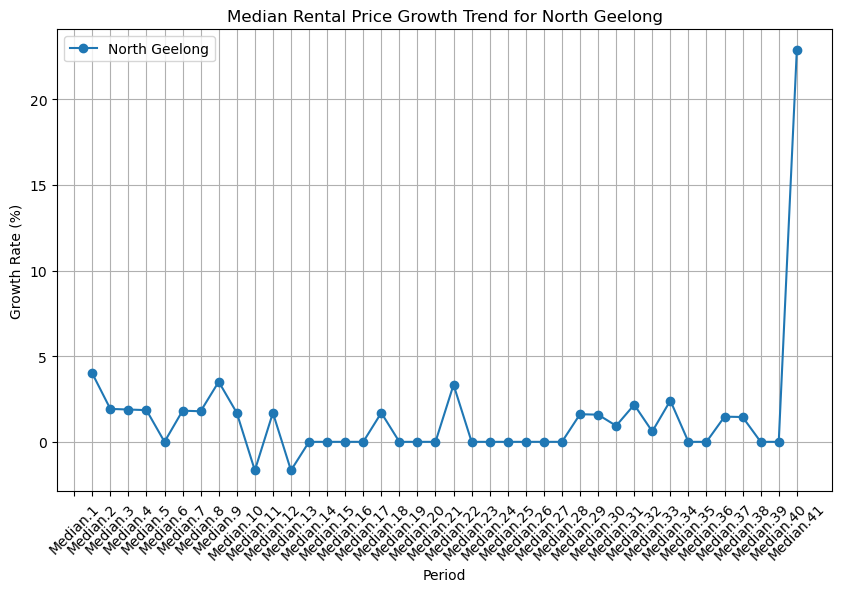

Growth trend for Group Total:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
7      <NA>       4.0       0.0  3.846154  1.851852  1.818182       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
7  1.785714  1.754386        0.0  ...   1.538462        0.0   3.030303   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
7        0.0   2.941176        0.0        0.0   1.428571   19.71831   

   Average Growth Rate (%)  
7                 1.380528  

[1 rows x 42 columns]


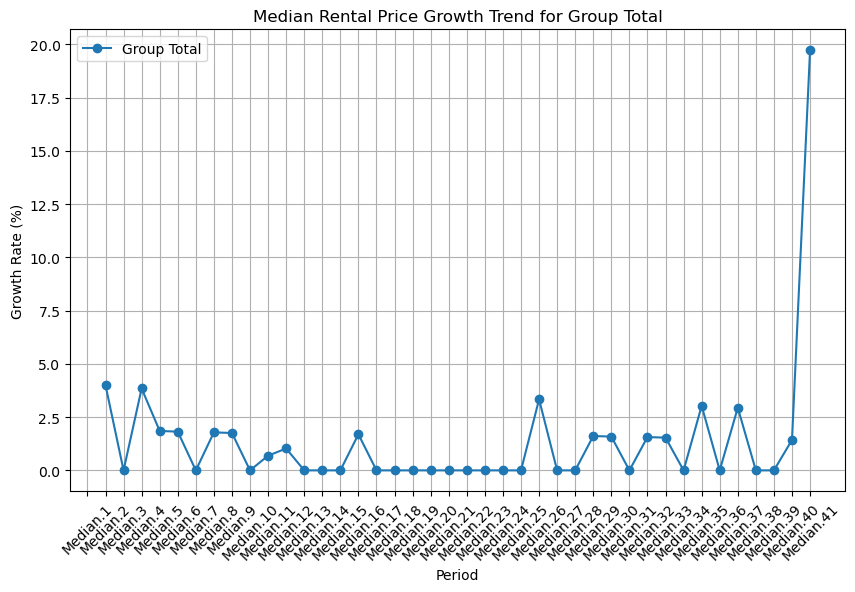

All suburbs growth trends:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0      <NA>  1.851852  1.818182  3.571429  3.448276       0.0  1.666667   
1      <NA>       0.0  4.761905  2.272727  2.222222       0.0  4.347826   
2      <NA>       4.0  3.846154       0.0  3.703704       0.0  3.571429   
3      <NA>  2.040816       0.0       4.0  3.846154       0.0  1.851852   
4      <NA>  1.111111  2.564103  1.785714  1.754386  3.448276       0.0   
5      <NA>       0.0  1.851852  1.818182  1.785714  5.263158       0.0   
6      <NA>       4.0  1.923077  1.886792  1.851852       0.0  1.818182   
7      <NA>       4.0       0.0  3.846154  1.851852  1.818182       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
0  1.639344       0.0   1.612903  ...   2.857143        0.0   1.388889   
1       0.0       0.0   2.083333  ...   1.923077   1.886792   1.851852   
2       0.0       0.0        0.0  ...        0.0     1.5625   1.538462   
3

In [6]:
import matplotlib.pyplot as plt
# Calculate the growth rate for each suburb separately and plot them
growth_trends = pd.DataFrame()

for suburb in median_data['Suburb'].unique():
    # Filter the data for the specific suburb
    suburb_data = median_data[median_data['Suburb'] == suburb].copy()

    # Calculate the percentage change in the median rental prices across the periods
    suburb_data_growth = suburb_data[median_columns].pct_change(axis='columns') * 100

    # Calculate cumulative growth or average growth as needed (here, taking the mean growth rate)
    suburb_data_growth['Average Growth Rate (%)'] = suburb_data_growth.mean(axis=1)

    # Append the results to the main DataFrame
    growth_trends = pd.concat([growth_trends, suburb_data_growth], ignore_index=True)

    # Print the growth trend for the suburb
    print(f"Growth trend for {suburb}:")
    print(suburb_data_growth)

    # Plotting the growth trend for the current suburb
    plt.figure(figsize=(10, 6))
    plt.plot(suburb_data_growth.columns[:-1], suburb_data_growth.iloc[0, :-1], marker='o', linestyle='-', label=suburb)
    plt.title(f'Median Rental Price Growth Trend for {suburb}')
    plt.xlabel('Period')
    plt.ylabel('Growth Rate (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Optional: Print all the growth trends for all suburbs
print("All suburbs growth trends:")
print(growth_trends)

In [7]:
print(growth_trends["Average Growth Rate (%)"])

0    1.325387
1    1.326946
2    1.390012
3    1.398067
4    1.541424
5    1.332605
6    1.423918
7    1.380528
Name: Average Growth Rate (%), dtype: Float64
